# Proyecto: Análisis de mercado inmobiliario

¡Bienvenido/a al primer proyecto de la carrera de Data Science de Acamica! 

El objetivo de este proyecto es reproducir los pasos que haría un/a Data Scientist cuando se enfrenta a una problemática real. Por eso, consta de tres secciones:
* En la Parte 1, te presentamos la problemática sobre la cual vas a trabajar. En esta sección deberás decidir qué datos te ayudarán a trabajar en este problema y dónde puedes conseguirlos.
* En la Parte 2 te proveemos de un dataset para abordar la problemática planteada. Deberás realizar un Análisis Exploratorio de Datos sobre este dataset.
* En la Parte 3, deberás utilizar herramientas de Machine Learning para predecir la variable de interés.


En este proyecto vas a trabajar con un dataset de propiedades en venta publicado en el portal [Properati](www.properati.com.ar).

**Importante:** recuerda que un notebook es un informe, por lo que debes ir explicando lo que haces a medida que resuelves las consignas. Es importante que quien que lo lea entienda el flujo de trabajo, qué quisiste hacer. Recuerda, simple y conciso es una combinación ganadora. 

## Problema

Recientemente te has incorporado al equipo de Datos de una gran inmobiliaria. La primera tarea que se te asigna es ayudar a los tasadores/as a valuar las propiedades, ya que es un proceso difícil y, a veces, subjetivo. Para ello, propones crear un modelo de Machine Learning que, dadas ciertas características de la propiedad, prediga su precio de venta.

### 1. Pensando como un/a Data Scientist

Responde la siguientes pregunta:
1. ¿Qué datos crees que te ayudarían a trabajar en el problema?¿Por qué?

**Importante**: NO deberás buscar esos datos, solamente justificar qué información crees que te ayudaría a resolver la problemática planteada.

<br />
<br />
Para poder ayudar a los/as tasadores/as, en primer lugar voy a necesitar un muestreo de propiedades, identificando la cantidad de ambientes, los metros cuadrados, la localidad y barrio en que se encuentra y la antiguedad. <br />
<br />

---



### 2. Análisis Exploratorio de Datos

En esta sección, debes realizar un Análisis Exploratorio de Datos sobre el dataset de propiedades de Properati. Es importante que respondas las siguientes preguntas durante el análisis:

* ¿Qué tamaño tiene el dataset?¿Cuántas instancias y cuántas columnas?
* ¿Cuántos valores faltantes hay en cada columna?
* ¿Cómo es la distribución de cada variable? Deberás hacer histogramas para las variables numéricas y gráficos de barras para las variables categóricas.
* ¿Cómo se relacionan las variables entre sí?¿Qué tipo de gráfico será conveniente para presentar esta información?
* ¿Cómo están correlacionadas las variables numéricas?¿Qué tipo de gráfico será conveniente para presentar esta información?¿Cuáles serán los mejores predictores de la variable de interés?

Vas a encontrar instrucciones para responder estas preguntas. Es importante aclarar que estas instrucciones corresponden al **mínimo entregable** que esperamos en la consigna.

**Comentarios sobre el dataset** 
1. Nosotros ya hicimos un *curado* sobre el dataset que puedes descargar directamente de la página de Properati. Muchos de los pasos que hicimos para curar el conjunto de datos los veremos durante el Bloque 2 de la carrera.

2. Si tienes dudas sobre qué representa alguna de las columnas, puedes consultar [aquí](https://www.properati.com.ar/data/). Notarás que algunas columnas fueron descartadas.

3. `Capital Federal` refiere a la Ciudad de Buenos Aires. `Bs.As. G.B.A. Zona Norte`, `Bs.As. G.B.A. Zona Sur` y `Bs.As. G.B.A. Zona Oeste` son regiones que conforman el [Gran Buenos Aires](https://es.wikipedia.org/wiki/Gran_Buenos_Aires), un conjunto de ciudades que rodean a la Ciudad de Buenos Aires.



0. Importa las librerías necesarias para trabajar en la consigna.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

#visualización
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


1. Carga el dataset usando las funcionalidades de Pandas. Imprimir cuántas filas y columnas tiene, y sus cinco primeras instancias.

In [3]:
#carga de dataset
data = pd.read_csv('/content/drive/MyDrive/DS_Proyecto_01_Datos_Properati.csv')

#muestra de cantidad de filas y columnas
print('Cantidad de filas y columnas respectivamente:', data.shape)

Cantidad de filas y columnas respectivamente: (146660, 19)


In [4]:
#muestra de sus primera 5 instancias
data.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


2. **Valores Faltantes**: imprime en pantalla los nombres de las columnas y cuántos valores faltantes hay por columna.

In [5]:
#muestra de nombres de las columnas del dataset
print('Nombre de las columnas: ', data.columns)

Nombre de las columnas:  Index(['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2', 'l3',
       'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
       'price', 'currency', 'title', 'description', 'property_type',
       'operation_type'],
      dtype='object')


In [6]:
#muestra de cantidad de valores faltantes por columna
df = pd.DataFrame(data.isna().sum())
df.columns = ['cantidad']
df['porcentaje %'] = df['cantidad'] / data.shape[0] * 100
ordenado = df.sort_values('cantidad', ascending=False)
print('Cantidad de valores faltantes por columna ordenados de mayor a menor, con su respectivo porcentaje:')
ordenado 


Cantidad de valores faltantes por columna ordenados de mayor a menor, con su respectivo porcentaje:


,cantidad,porcentaje %
surface_covered,21614,14.737488
surface_total,20527,13.996318
lon,9959,6.790536
lat,9925,6.767353
bathrooms,5957,4.061776
start_date,0,0.000000
property_type,0,0.000000
description,0,0.000000
title,0,0.000000
currency,0,0.000000


<Figure size 720x432 with 0 Axes>

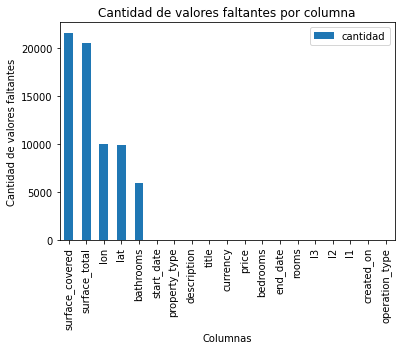

In [7]:
df = pd.DataFrame(data.isna().sum())
df.columns = ['cantidad']
ordenado = df.sort_values('cantidad', ascending=False)

plt.figure(figsize= (10,6))
ordenado.plot(kind='bar')
plt.xlabel('Columnas')
plt.ylabel('Cantidad de valores faltantes')
plt.title('Cantidad de valores faltantes por columna')
plt.show()

Como conclusión, podemos ver que hay muchas filas para filtrar del dataset, debido a que existen muchos valores vacíos que no aportan a nuestro análisis.
Las columnas de superficie total y superficie cubierta, son las columnas que tienen más valores faltantes, como también la longitud y latitud pero en una menor medida. Existe un 4% de propiedades que no tienen cargado el dato de la cantidad de baños.

De acá también podemos observar que la mayoría de veces que no se completa la superficie total, tampoco la cubierta, y viceversa. 
Y lo mismo pasa con lat y long, son dos datos que se completan en conjunto. 
El resto de los datos, al tener 0% de valores faltantes, da indicio que es restricción de negocio de la página en donde se cargan, que no se puede publicar una propiedad con dichos datos en blanco.

3. **Tipos de propiedad**: ¿Cuántos tipos de propiedad hay publicados según este dataset?¿Cuántos instancias por cada tipo de propiedad hay en el dataset? Responde esta pregunta usando las funcionalidad de Pandas y con un gráfico apropiado de Seaborn. **Pistas**: Te puede ser útil googlear cómo rotar las etiquetas del eje x.

In [8]:
#muestra cantidad de tipos de propiedad.

tipos_propiedad = pd.unique(data["property_type"]).tolist()
count=0
for tipo in tipos_propiedad:
    count += 1
print("La cantidad de tipos de propiedad que hay publicados es de",count, "tipos.")


La cantidad de tipos de propiedad que hay publicados es de 10 tipos.


In [9]:
tipos_prop = pd.DataFrame(data["property_type"].value_counts())
tipos_prop.columns = ['cantidad']
tipos_prop['porcentaje %'] = tipos_prop['cantidad'] / data.shape[0] * 100
tipos_prop_ordenado  = tipos_prop.sort_values('cantidad', ascending=False)
print('Cantidad de propiedades por tipo de propiedad ordenados de mayor a menor:')
tipos_prop_ordenado 

Cantidad de propiedades por tipo de propiedad ordenados de mayor a menor:


,cantidad,porcentaje %
Departamento,107326,73.180145
Casa,21521,14.674076
PH,14298,9.749080
Lote,1312,0.894586
Oficina,658,0.448657
Otro,374,0.255012
Local comercial,325,0.221601
Casa de campo,322,0.219555
Depósito,265,0.180690
Cochera,259,0.176599


Text(0.5, 1.0, 'Cantidad de propiedades por tipo de propiedad')

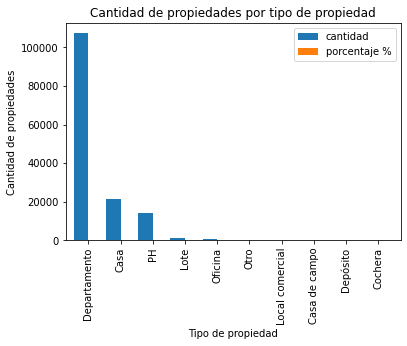

In [10]:
#graficar cantidad de instancias por cada tipo de propiedad

tipos_prop.plot(kind = 'bar', width = 0.9)
plt.xlabel('Tipo de propiedad')
plt.ylabel('Cantidad de propiedades')
plt.title('Cantidad de propiedades por tipo de propiedad')


Como podemos observar, hay una gran diferencia en las cantidades de propiedades publicadas según el tipo de propiedad. En primer lugar, el tipo de propiedad departamento con más de 100 mil publicaciones, representando el 73% de las propiedades y luego, casa y PH con más de 10 mil. Del resto de los tipos de propiedad podría decirse que hay muy pocas publicaciones

4. ¿De qué regiones son las publicaciones? Haz gráficos de barras para las variables `l2` y `l3`. Si te animas, puedes hacer los dos gráficos usando `subplot` de Matplotlib. Dale un tamaño apropiado a la figura para que ambos gráficos se visualicen correctamente.

In [11]:
region = pd.DataFrame(data["l2"].value_counts())
region.columns = ['cantidad']
region['porcentaje %'] = region['cantidad'] / data.shape[0]  * 100
region_ordenado  = region.sort_values('cantidad', ascending=False)
print('Cantidad de propiedades por región L2 ordenados de mayor a menor:')
region_ordenado 

Cantidad de propiedades por región L2 ordenados de mayor a menor:


,cantidad,porcentaje %
Capital Federal,92539,63.097641
Bs.As. G.B.A. Zona Norte,24282,16.556662
Bs.As. G.B.A. Zona Sur,17173,11.709396
Bs.As. G.B.A. Zona Oeste,12666,8.636302


Text(0.5, 1.0, 'Cantidad de propiedades por zona')

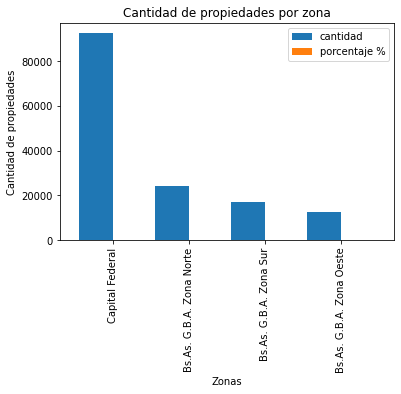

In [12]:
#grafico cantidad de instancias por cada region

region_ordenado.plot(kind = 'bar', width = 0.9)
plt.xlabel('Zonas')
plt.ylabel('Cantidad de propiedades')
plt.title('Cantidad de propiedades por zona')

Podemos observar en el gráfico que hay una diferencia muy notoria entre las cantidades de propiedades según la zona. Más del 63% de las propiedades se encuentran en capital federal, mientras que en zona norte, zona sur y zona oeste se encuentran más parejas con el 16%, 11% y 8% respectivamente. 

In [13]:
sub_region = pd.DataFrame(data["l3"].value_counts())
sub_region.columns = ['cantidad']
sub_region['porcentaje %'] = sub_region['cantidad'] / sub_region['cantidad'].sum() * 100
sub_region_ordenado  = sub_region.sort_values('cantidad', ascending=False)
print('Cantidad de propiedades por barrio ordenados de mayor a menor:')
sub_region_ordenado 

Cantidad de propiedades por barrio ordenados de mayor a menor:


,cantidad,porcentaje %
Palermo,13073,8.913814
Tigre,8718,5.944361
Almagro,7527,5.132279
Belgrano,6935,4.728624
Caballito,6650,4.534297
...,...,...
Cañuelas,108,0.073640
Villa Soldati,69,0.047048
Villa Riachuelo,42,0.028638
Marcos Paz,35,0.023865


Text(0.5, 1.0, 'Cantidad de propiedades por bario')

<Figure size 1080x720 with 0 Axes>

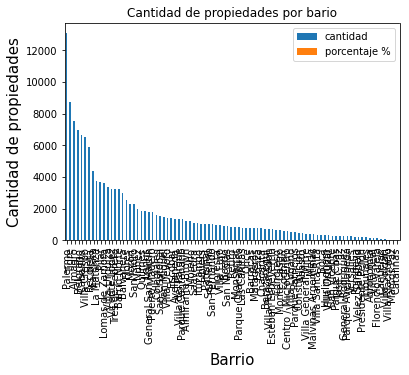

In [14]:
plt.figure(figsize=(15,10))
sub_region_ordenado.plot(kind = 'bar', width = 0.9)
plt.xlabel('Barrio', size=15)
plt.ylabel('Cantidad de propiedades', size=15)
plt.title('Cantidad de propiedades por bario')

5. **Filtrando el Dataset:** A partir de los resultados del punto 3. y 4., selecciona las tres clases más abundantes de tipos de propiedad y la región con más propiedades publicadas. Crea un nuevo Data Frame con aquellas instancias que cumplen con esas condiciones e imprime su `shape`.

In [15]:
#selecciono las tres clases más abundntes de tipos de propiedad
propiedades = data[data.property_type.isin(['Departamento', 'Casa', 'PH'])]

#a esas propiedades, filtro por la region más frecuente
propiedades_region = propiedades[propiedades.l2.isin(['Capital Federal'])]

#armo un dataframe 
df_propiedades = pd.DataFrame(propiedades_region)

#muestro su shape
print('La cantidad de filas:', propiedades_region.shape[0], 'y columnas:', propiedades_region.shape[1])

La cantidad de filas: 91485 y columnas: 19




**Checkpoint:** deberías tener un dataset con 91485 instacias, 19 columnas.

6. **Distribuciones y relaciones de a pares:** Estudia la distribución y las relaciones de a pares de las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price` para cada tipo de propiedad. Para ello, ten en cuenta:
    1. Obtiene estadísticos que te sirvan para tener una primera idea de los valores que abarcan estas variables. ¿Cuáles crees que toman valores que tal vez no tengan mucho sentido?
    1. Algunas instancias tienen valores de superficie (`surface_total`) muy grandes y dificultan la correcta visualización. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Lo mismo ocurre con valores de superficie total muy chico.
    1. Las propiedades no pueden tener `surface_covered` mayor a `surface_total`. Si eso sucede, debes filtrar esas instancias.
    1. El rango de precios que toman las propiedades es muy amplio. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Una vez filtrado el dataset, puedes utilizar la función `pairplot` de Seaborn.

In [16]:
#elimino las columnas que no aportan valor para mi análisis
propiedades_region.drop(['lon', 'lat', 'start_date', 'end_date', 
                         'created_on', 'l1', 'currency', 'operation_type', 'l2'], 1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [17]:
#realizo un describe a los datos para saber más información que será importante para luego tomar decisiones
propiedades_region.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,91485.000000,91485.000000,89314.000000,82568.000000,82250.000000,9.148500e+04
mean,2.964278,1.960278,1.560147,112.626369,94.966310,2.595003e+05
std,1.314704,1.072946,0.860309,980.713664,778.515243,3.222654e+05
min,1.000000,0.000000,1.000000,10.000000,1.000000,6.000000e+03
25%,2.000000,1.000000,1.000000,49.000000,44.000000,1.200000e+05
50%,3.000000,2.000000,1.000000,71.000000,63.000000,1.750000e+05
75%,4.000000,3.000000,2.000000,111.000000,96.000000,2.790000e+05
max,26.000000,15.000000,14.000000,126062.000000,126062.000000,3.243423e+07


Con esta información proporcionada por el método describe() podemos ver distintos valores que serán necesarios para poder analizar los datos. Por ejemplo, con la desviación estándar, podremos saber si los valores que puede llegar a tomar una variable son muy variados y así identificar valores atípicos y descartarlos para evitar malos resultados.

Las medias están muy alejadas de los máximos valores, por lo tanto se puede identificar la presencia de outliers

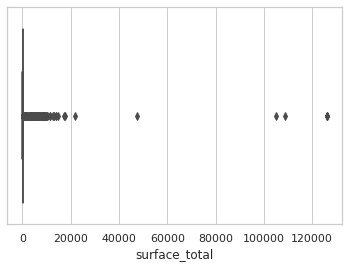

In [18]:
#comienzo a verificar la distribucion de surface_total

sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=propiedades_region["surface_total"])

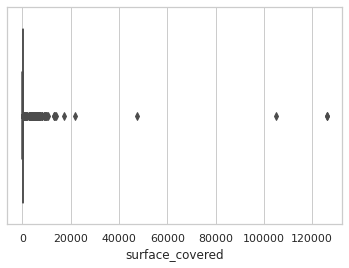

In [19]:
#verifico la distribucion de superficie cubierta

sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=propiedades_region["surface_covered"])

Podemos notar la presencia de outliers, es decir, de valores que son atípicos tanto en la superficie total como en la superficie cubierta, y por lo tanto nos perjudica en el análisis de nuestros datos. Voy a proceder a filtrar estos valores


In [20]:
#filtramos valores de surface_total

#en primer lugar, filtramos aquellas propiedades que tienen la superficie cubierta mayor a la total, y que sea menor a 600 metros.
propiedades_region = propiedades_region[(propiedades_region['surface_total']>=propiedades_region['surface_covered']) 
& (propiedades_region['surface_total'] < 600.0)]

propiedades_region.shape

(80981, 10)

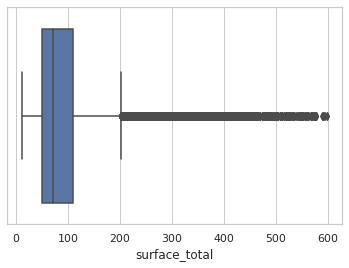

In [21]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=propiedades_region["surface_total"])

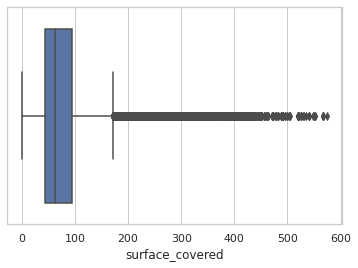

In [22]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=propiedades_region["surface_covered"])

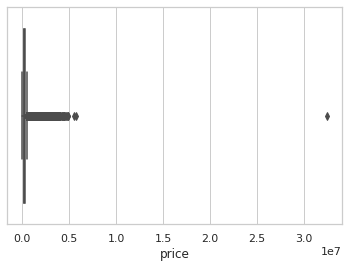

In [23]:
#verifico la distribución del precio

sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=propiedades_region["price"])

In [24]:
#noto que hay outliers, por lo tanto los filtro 
propiedades_region = propiedades_region[(propiedades_region['price'] < 1000000)]


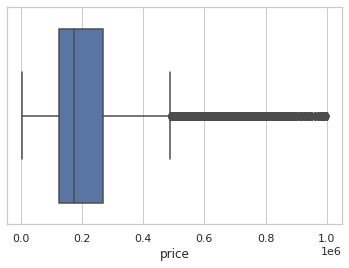

In [25]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=propiedades_region["price"])

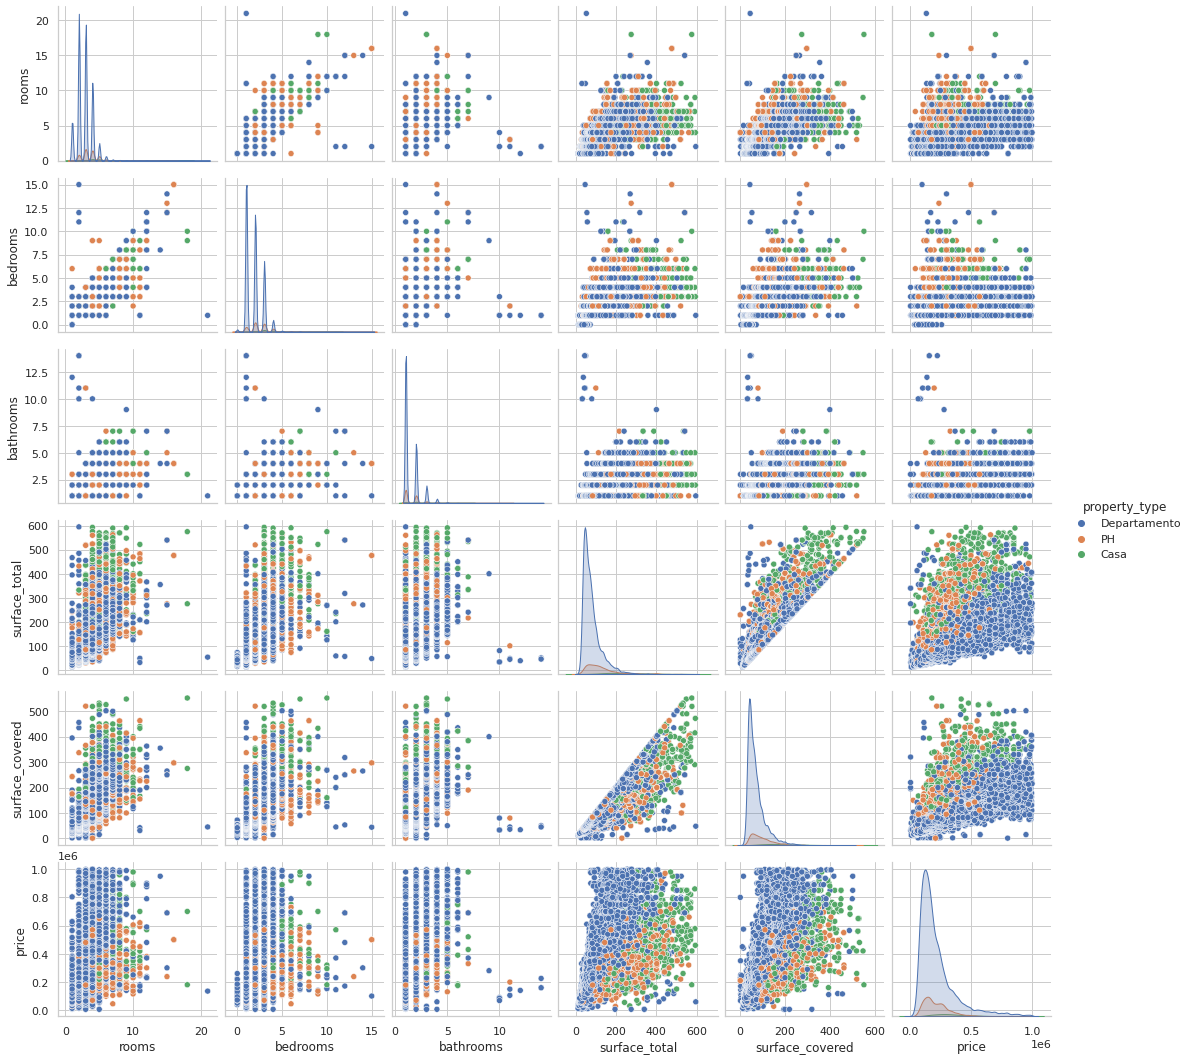

In [ ]:
sns.pairplot(data=propiedades_region, hue='property_type')
plt.show()

7. **Correlaciones:** Estudia la correlación entre las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price`. ¿Cuáles son las mejores variables para predecir el precio?¿Qué diferencias encuentras según cada tipo de propiedad?



In [26]:
#construyo matriz de correlación para comprender la relación entre las diversas variables.
 
propiedades_region.corr()


,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
rooms,1.000000,0.929927,0.580259,0.730632,0.778596,0.572560
bedrooms,0.929927,1.000000,0.583093,0.709159,0.754982,0.542112
bathrooms,0.580259,0.583093,1.000000,0.601582,0.653987,0.661265
surface_total,0.730632,0.709159,0.601582,1.000000,0.920164,0.690558
surface_covered,0.778596,0.754982,0.653987,0.920164,1.000000,0.748006
price,0.572560,0.542112,0.661265,0.690558,0.748006,1.000000


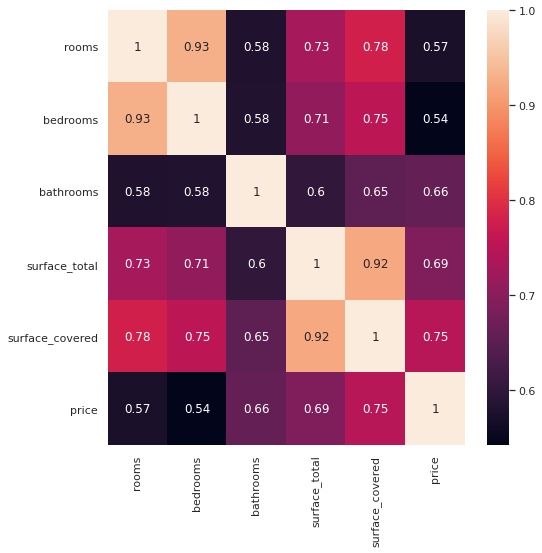

In [27]:
#visualizar de forma gráfica
correlation_mat = propiedades_region.corr()
plt.figure(figsize=(8,8))

sns.heatmap(correlation_mat, annot = True)

plt.show()

Los valores cercanos a 1 indican la presencia de una fuerte relación positiva entre X e Y, 
mientras que los cercanos a -1 indican una fuerte relación negativa entre X e Y.
Los valores cercanos a cero significan que no existe ninguna relación entre X e Y.

En este caso, podeemos observar que hay una fuerte correlación entre la superficie total y la superficie cubierta. Como así también, una correlación entre la superficie cubierta y los ambientes, y la superficie cubierta y el precio.

### 2.1 Desafío

En el dataset provisto hay mucha información, más allá del problema planteado. Propone una pregunta que pueda ser respondida por el dataset e intenta responderla.¿Cuáles son los sesgos de la respuesta obtenida?(¿Cuán generalizable es la respuesta obtenida?)¿Necesitas información complementaria?¿Cómo la obtendrías?

Por ejemplo: ¿Cuál es el barrio más caro de Buenos Aires? Probablemente puedas responder esta pregunta con este dataset. Pero podria ocurrir que la respuesta esté sesgada. ¿Cómo? Tal vez las propiedades más caras no se publican de forma online, sino que utilizan otro canal de venta.


Como desafío, me propongo obtener cuál es el barrio que tiene propiedades más grandes, es decir, con mayor superficie total.

In [28]:
#carga de dataset
data = pd.read_csv('/content/drive/MyDrive/DS_Proyecto_01_Datos_Properati.csv')

data = data[(data['surface_total']>=data['surface_covered']) 
& (data['surface_total'] < 600.0) & (data['price']<1000000.0)]

In [29]:
#filtro las columnas que necesito 
data =  data.filter(items=['l2', 'surface_total'])

data

,l2,surface_total
0,Capital Federal,140.0
1,Capital Federal,70.0
2,Capital Federal,45.0
3,Capital Federal,85.0
4,Bs.As. G.B.A. Zona Sur,50.0
...,...,...
146655,Bs.As. G.B.A. Zona Sur,54.0
146656,Bs.As. G.B.A. Zona Norte,164.0
146657,Bs.As. G.B.A. Zona Norte,50.0
146658,Bs.As. G.B.A. Zona Norte,38.0


In [30]:
def calcular_promedio(region):
  '''
    Dada una región, imprime el total de la superficie 
    total de las propiedades publicadas
    
    Arguments:
    region: region a calcular
    
    return 
    promedio.
    '''
  capital = data['l2'] == region
  capital = data[capital]

  suma = capital['surface_total'].sum()
  cantidad = capital['surface_total'].count()

  promedio = suma /cantidad

  return promedio

In [36]:
#calculo el promedio por zona
zonas = ['Capital Federal', 'Bs.As. G.B.A. Zona Norte', 'Bs.As. G.B.A. Zona Oeste', 'Bs.As. G.B.A. Zona Sur']
promedios = []

for zona in zonas:
  promedio = calcular_promedio(zona)
  promedios.append(promedio)


In [38]:
#creo un data frame con las zonas y sus respectivos promedios 
df_promedio = pd.DataFrame({'region': zonas, 'promedio': promedios})
df_promedio

,region,promedio
0,Capital Federal,88.858477
1,Bs.As. G.B.A. Zona Norte,124.385255
2,Bs.As. G.B.A. Zona Oeste,149.075270
3,Bs.As. G.B.A. Zona Sur,155.736327


Text(0.5, 1.0, 'Promedio de superficie total por zona')

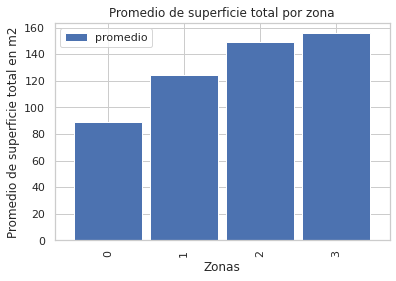

In [39]:
#grafico

df_promedio.plot(kind = 'bar', width = 0.9)
plt.xlabel('Zonas')
plt.ylabel('Promedio de superficie total en m2')
plt.title('Promedio de superficie total por zona')

Podemos observar la diferencia del promedio de superficie total de cada zona, siendo Capital Federal la zona con propiedades con menor promedio de metros cuadrados. Esto puede ser debido a que la mayor cantidad de propiedades de dicha zona son departamentos. Procedo a verificar esta hipótesis

In [40]:
#carga de dataset
data2 = pd.read_csv('/content/drive/MyDrive/DS_Proyecto_01_Datos_Properati.csv')

data2 = data2[(data2['surface_total']>=data2['surface_covered']) 
& (data2['surface_total'] < 600.0) & (data2['price']<1000000.0)]

In [50]:
tipos=["Departamento", "PH", "Casa"]

data3 = data2[data2.property_type.isin(tipos) & (data2.l2.isin(['Capital Federal']))]

data4 = data2[data2.property_type.isin(tipos) & data2.l2.isin(['Bs.As. G.B.A. Zona Sur'])]

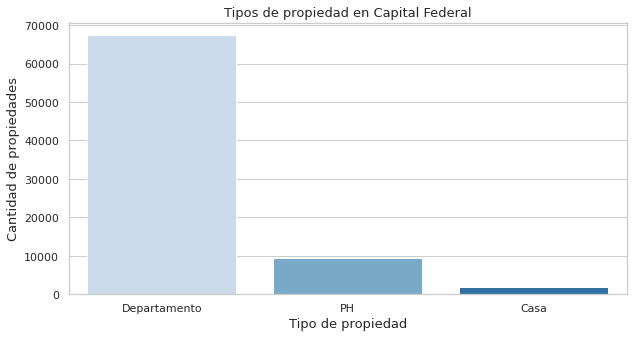

In [53]:
#armo gráfico para visualizar la cantidad de propiedades según el tipo en capital federal
plt.figure(figsize =(10,5))

sns.countplot(x='property_type', data=data3, palette='Blues')
plt.ylabel('Cantidad de propiedades', size=13)
plt.xlabel('Tipo de propiedad', size=13)
plt.title('Tipos de propiedad en Capital Federal', size=13)

plt.show()

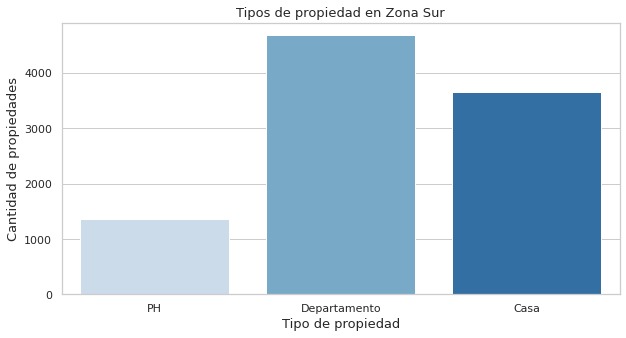

In [52]:
#armo gráfico para visualizar la cantidad de propiedades según el tipo en zona sur
plt.figure(figsize =(10,5))

sns.countplot(x='property_type', data=data4, palette='Blues')
plt.ylabel('Cantidad de propiedades', size=13)
plt.xlabel('Tipo de propiedad', size=13)
plt.title('Tipos de propiedad en Zona Sur', size=13)

plt.show()

Podemos observar que, en Capital Federal, hay una amplia diferencia entre la cantidad de publicaciones que son de departamentos, contra casa y PH. Esto puede justificar que Capital Federal sea la zona con propiedades con menor superficie total. 
Por otro lado, si verificamos, por ejemplo, los tipos de propiedad en Zona Sur, que es la zona con las propiedades con mayor promedio de superficie cubierta podremos observar que si bien los departamentos siguen liderando, es mucho menor a la diferencia con las cantidades de casas y PH publicados.

### 3. Machine Learning

En esta sección, debes entrenar dos modelos de Machine Learning - uno de vecinos más cercanos y otro de árboles de decisión -  para predecir el precio de las propiedades tipo `Departamento`, `PH` y `Casa`  en la Ciudad Autónoma de Buenos Aires (`Capital Federal`). Para ello, no debes olvidarte de:

* Elegir una métrica apropiada para evaluar los resultados de los modelos.
* Seleccionar las variables predictoras (`X`) y la variable a predecir (`y`). 
* Realizar un Train/Test split de los datos.
* Generar un modelo *benchmark* y evaluarlo.
* Entrenar un modelo de vecinos más cercanos y un modelo de árbol de decisión con hiperparámetros iniciales de su elección.
* Evaluar los modelos obtenidos. Para ello, evalúa la métrica elegida en el conjunto de Test y en el conjunto de Train. También, realiza gráficos de valores reales vs. valores predichos.
* Mejorar el desempeño de sus modelos optimizando el número de vecinos y la profundidad del árbol, respectivamente.
* Entre los modelos entrenados, ¿cuál elegirías para utilizar?¿Por qué? 
* Ser **crítico/a** con la metodología utilizada. Por ejemplo, responde las siguientes preguntas: ¿Qué información no estás usando que podría ayudar al modelo?¿Qué información puede estar demás o repetida?

Estos lineamientos corresponden al **mínimo entregable** de esta sección.


**Importante:** para asegurarnos que trabajes con un dataset apropiados, debes volver a cargar los datos y realizar el siguiente filtrado:

1. Selecciona aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.
1. Selecciona aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2.
1. Selecciona aquellas propiedades cuya precio es menor 4000000 dólares.
1. Selecciona las columnas `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered` y `price`.
1. Descarta aquellas instacias con valores faltantes.

**Checkpoint:** deberías obtener un dataset con 81019 instacias y 6 columnas.

In [57]:
#carga de dataset
data_ml = pd.read_csv('/content/drive/MyDrive/DS_Proyecto_01_Datos_Properati.csv')

In [58]:
#filtrado de datos
data3 = data_ml[(data_ml['l2'] == 'Capital Federal') & (data_ml.property_type.isin(['Departamento', 'Casa', 'PH'])) 
                &  (data_ml['surface_total'] >= 15 ) & (data_ml['surface_total'] <= 1000) & (data_ml['price'] <= 4000000)]
data3 = data3.filter(items=['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price'])

data3 = data3.dropna()
data3.shape

(81019, 6)

In [59]:
data3.head()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
0,7.0,7.0,2.0,140.0,140.0,153000.0
1,2.0,1.0,2.0,70.0,58.0,159000.0
2,2.0,1.0,1.0,45.0,45.0,125000.0
3,2.0,1.0,1.0,85.0,50.0,295000.0
5,2.0,1.0,1.0,56.0,56.0,150000.0


In [60]:
#importo las librerias necesarias 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix

In [61]:
#divido el data set, 70% datos para entrenar el modelo, y 30% para probarlo.

X= data3.drop(['price'], axis=1)
y= data3['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(56713, 5) (24306, 5) (56713,) (24306,)


In [63]:
print(X)

        rooms  bedrooms  bathrooms  surface_total  surface_covered
0         7.0       7.0        2.0          140.0            140.0
1         2.0       1.0        2.0           70.0             58.0
2         2.0       1.0        1.0           45.0             45.0
3         2.0       1.0        1.0           85.0             50.0
5         2.0       1.0        1.0           56.0             56.0
...       ...       ...        ...            ...              ...
146554    4.0       3.0        3.0          175.0            111.0
146555    3.0       2.0        2.0          144.0            134.0
146556    4.0       2.0        2.0          317.0            143.0
146557    3.0       2.0        2.0          145.0            145.0
146558    4.0       3.0        5.0          220.0            210.0

[81019 rows x 5 columns]


In [64]:
print(y)

0          153000.0
1          159000.0
2          125000.0
3          295000.0
5          150000.0
            ...    
146554     570000.0
146555     480000.0
146556     530000.0
146557     420000.0
146558    1470000.0
Name: price, Length: 81019, dtype: float64


En primer lugar, voy a realizar un modelo de regresión lineal como benchmark para un punto de partida


In [62]:
#REGRESIÓN LINEAL 

#creo el objeto regresor lineal
lineal_regressor = LinearRegression()

In [65]:
#entreno el modelo con los datos de entrenamiento
lineal_regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [67]:
y_train_pred_lin = lineal_regressor.predict(X_train)
y_test_pred_lin = lineal_regressor.predict(X_test)

In [68]:
#calculo error cuadrático medio
rmse_lin_train = np.sqrt(mean_squared_error(y_train, y_train_pred_lin))
rmse_lin_test = np.sqrt(mean_squared_error(y_test, y_test_pred_lin))

print('El error cuadrático medio en regresión lineal en el conjunto de datos de entrenamiento es de:', rmse_lin_train)
print('El error cuadrático medio en regresión lineal en el conjunto de datos de test es de:', rmse_lin_test)


El error cuadrático medio en regresión lineal en el conjunto de datos de test es de: 202449.36540361578
El error cuadrático medio en regresión lineal en el conjunto de datos de entrenamiento es de: 199173.83253528475


Concluyo que, el modelo es muy general y cuenta con poca precisión.

In [69]:
#ARBOL
#creo el objeto arbol
clf_tree = DecisionTreeRegressor()

In [70]:
#fiteo el arbol con los datos de entrenamiento. En este caso no voy a setearle los hiperparámetros, y voy a dejar que por defecto asuma los valores que sea dapten
clf_tree.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [71]:
y_train_pred = clf_tree.predict(X_train)
y_test_pred = clf_tree.predict(X_test)

In [72]:
#obtener el RMSE- Primero obtengo el error cuadratico promedio y luego raiz cuadrada
rmse_train_Tree = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test_Tree = np.sqrt(mean_squared_error(y_test, y_test_pred))
print('El error cuadrático medio en el conjunto de datos de entrenamiento es de::', rmse_train_Tree)
print('El error cuadrático medio en el conjunto de datos de test es de::', rmse_test_Tree)

Train: 52460.90877279167
Test: 149647.08478886375


In [73]:
#optimizo el hiperparámetro max depth

# Definimos las listas vacias para los valores de accuracy deseados
lista_rmse_train = []
lista_rmse_test = []
rmse_train=0
rmse_test=0

# Definimos la lista de valores de max_depth que vamos a explorar
max_depths = [1, 5, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 40, 50]

# Generamos en loop sobre los distintos valores de profundidad 
for max_depth in max_depths:
        
    # Definir el modelo con el valor de profundidad
    clf = DecisionTreeRegressor(max_depth = max_depth, random_state=42)
    
    # Entrenar el modelo
    clf.fit(X_train,y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = clf.predict(X_train)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = clf.predict(X_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    # Agregar la información a las listas
    lista_rmse_train.append(rmse_train)
    lista_rmse_test.append(rmse_test)

In [75]:
min_test_tree = np.amin(lista_rmse_test)
lista_rmse_test_op = lista_rmse_test.index(min(lista_rmse_test))
max_depths_op = max_depths[lista_rmse_test_op]

print('El mínimo de RMSE en test es', min_test_tree, 'en la profundidad:', max_depths_op)

El mínimo de RMSE en test es 146092.75848556007 en la profundidad: 17


Text(0.5, 1.0, 'Redimiento Árbol de Decisión')

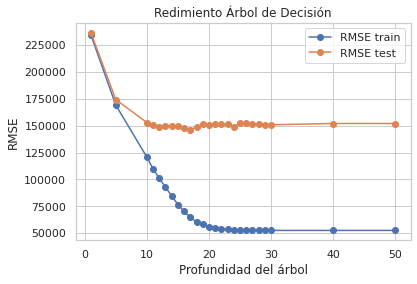

In [76]:
plt.plot(max_depths, lista_rmse_train,'o-',label='RMSE train' )
plt.plot(max_depths,lista_rmse_test,'o-',label='RMSE test')
plt.legend()
plt.xlabel('Profundidad del árbol')
plt.ylabel('RMSE')
plt.title("Redimiento Árbol de Decisión")

Si bien al calcular por código el la profundidad del árbol que minimiza el error cuadrático medio nos da una profundidad de 17, analizando el gráfico podemos ver que si tenemos una profundidad de 10, varía muy poco en la diferencia del RMSE, y encima se vuelve mucho más complejo. Por lo tanto, teniendo esto en cuenta, decido que la profundidad del árbol en este caso será de 10.
Procedo a entrenar mi modelo con dicha profundidad.

In [83]:
clf_tree = DecisionTreeRegressor(max_depth=17)
clf_tree.fit(X_train,y_train)

y_train_pred = clf_tree.predict(X_train)
y_test_pred = clf_tree.predict(X_test)

rmse_train_Tree = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test_Tree = np.sqrt(mean_squared_error(y_test, y_test_pred))
print('El error cuadrático medio en el conjunto de datos de entrenamiento es de:', rmse_train_Tree)
print('El error cuadrático medio en el conjunto de datos de test es de::', rmse_test_Tree)

Train: 64716.269976627125
Test: 145992.65412491458


CONCLUSIONNNNNNNNN
Si bien podemos observar que el error disminuyó, siguen siendo demasiados altos para los números de precios en USD que se manipulan.

A continuación, voy a entrenar un modelo de KNN para comparar

In [84]:
#creo un objeto knn regresor
knn_regressor = KNeighborsRegressor()
knn_regressor

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [86]:
#fiteo el modelo con los datos de entrenamiento

knn_regressor.fit(X_train, y_train)

y_train_pred_knn = knn_regressor.predict(X_train)
y_test_pred_knn = knn_regressor.predict(X_test)

In [90]:
#calculo el RMSE
rmse_knn_train = np.sqrt(mean_squared_error(y_train, y_train_pred_knn))
rmse_knn_test = np.sqrt(mean_squared_error(y_test, y_test_pred_knn))

print('El error cuadrático medio en KNN en el conjunto de datos de entrenamiento es de:', rmse_knn_train)
print('El error cuadrático medio en KNN en el conjunto de datos de test es de:', rmse_knn_test)


El error cuadrático medio en KNN en el conjunto de datos de entrenamiento es de: 121300.24049431273
El error cuadrático medio en KNN en el conjunto de datos de test es de: 155040.1332898459


In [91]:
#optimizo el hiperparámetro cantidad de vecinos

# Definimos las listas vacias para los valores de accuracy deseados
lista_rmse_train_knn = []
lista_rmse_test_knn = []
rmse_train_knn=0
rmse_test_knn=0

# Definimos la lista de valores de max_depth que vamos a explorar
vecinos = [1, 5, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 40, 50]

# Generamos en loop sobre los distintos valores de profundidad 
for i in vecinos:
        
    # Definir el modelo con el valor de profundidad
    knn_reg = KNeighborsRegressor(n_neighbors= i)
    
    # Entrenar el modelo
    knn_reg.fit(X_train,y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred_knn = knn_reg.predict(X_train)
    rmse_train_knn = np.sqrt(mean_squared_error(y_train, y_train_pred_knn))
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred_knn = knn_reg.predict(X_test)
    rmse_test_knn = np.sqrt(mean_squared_error(y_test, y_test_pred_knn))
    
    # Agregar la información a las listas
    lista_rmse_train_knn.append(rmse_train_knn)
    lista_rmse_test_knn.append(rmse_test_knn)

In [93]:
min_test_knn = np.amin(lista_rmse_test_knn)
lista_rmse_test_op_knn = lista_rmse_test_knn.index(min(lista_rmse_test_knn))
neighbors_op = vecinos[lista_rmse_test_op_knn]

print('El mínimo de RMSE en test es', min_test_knn, 'con la cantidad de vecinos:', neighbors_op)

El mínimo de RMSE en test es 155040.1332898459 con la cantidad de vecinos: 5


Text(0.5, 1.0, 'Redimiento KNN')

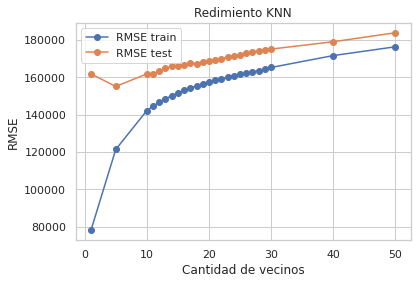

In [94]:
plt.plot(vecinos, lista_rmse_train_knn,'o-',label='RMSE train' )
plt.plot(vecinos,lista_rmse_test_knn,'o-',label='RMSE test')
plt.legend()
plt.xlabel('Cantidad de vecinos')
plt.ylabel('RMSE')
plt.title("Redimiento KNN")

In [95]:
#creo un objeto knn regresor con la cantidad de vecinos óptimas
knn_regressor = KNeighborsRegressor(n_neighbors=3)
knn_regressor.fit(X_train, y_train)

y_train_pred_knn = knn_regressor.predict(X_train)
y_test_pred_knn = knn_regressor.predict(X_test)
rmse_knn_train = np.sqrt(mean_squared_error(y_train, y_train_pred_knn))
rmse_knn_test = np.sqrt(mean_squared_error(y_test, y_test_pred_knn))

print('El error cuadrático medio en KNN en el conjunto de datos de entrenamiento es de:', rmse_knn_train)
print('El error cuadrático medio en KNN en el conjunto de datos de test es de:', rmse_knn_test)

El error cuadrático medio en KNN en el conjunto de datos de entrenamiento es de: 103804.20852724434
El error cuadrático medio en KNN en el conjunto de datos de test es de: 152317.82229037234
